In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import iplot
from sklearn.preprocessing import RobustScaler
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import TomekLinks
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

> # 1. Load Dataset

In [2]:
Data = pd.read_csv("creditcard.csv")
Data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


> ## 2. Information about dataset

In [3]:
Data.shape

(284807, 31)

In [4]:
Data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
Data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [7]:
Data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
Data.isnull()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284803,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284804,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284805,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
Data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
Data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


> ## 3. Cleaning

In [16]:
Data.drop_duplicates(inplace = True)
Data.shape

(283726, 31)

In [17]:
# Convert float64 to float32
float_columns = Data.select_dtypes(include=["float64"]).columns
Data[float_columns] = Data[float_columns].astype(np.float32)

# Convert int64 to int32
int_columns = Data.select_dtypes(include=["int64"]).columns
Data[int_columns] = Data[int_columns].astype(np.int32)

> ## 4. Data Pre-Processing

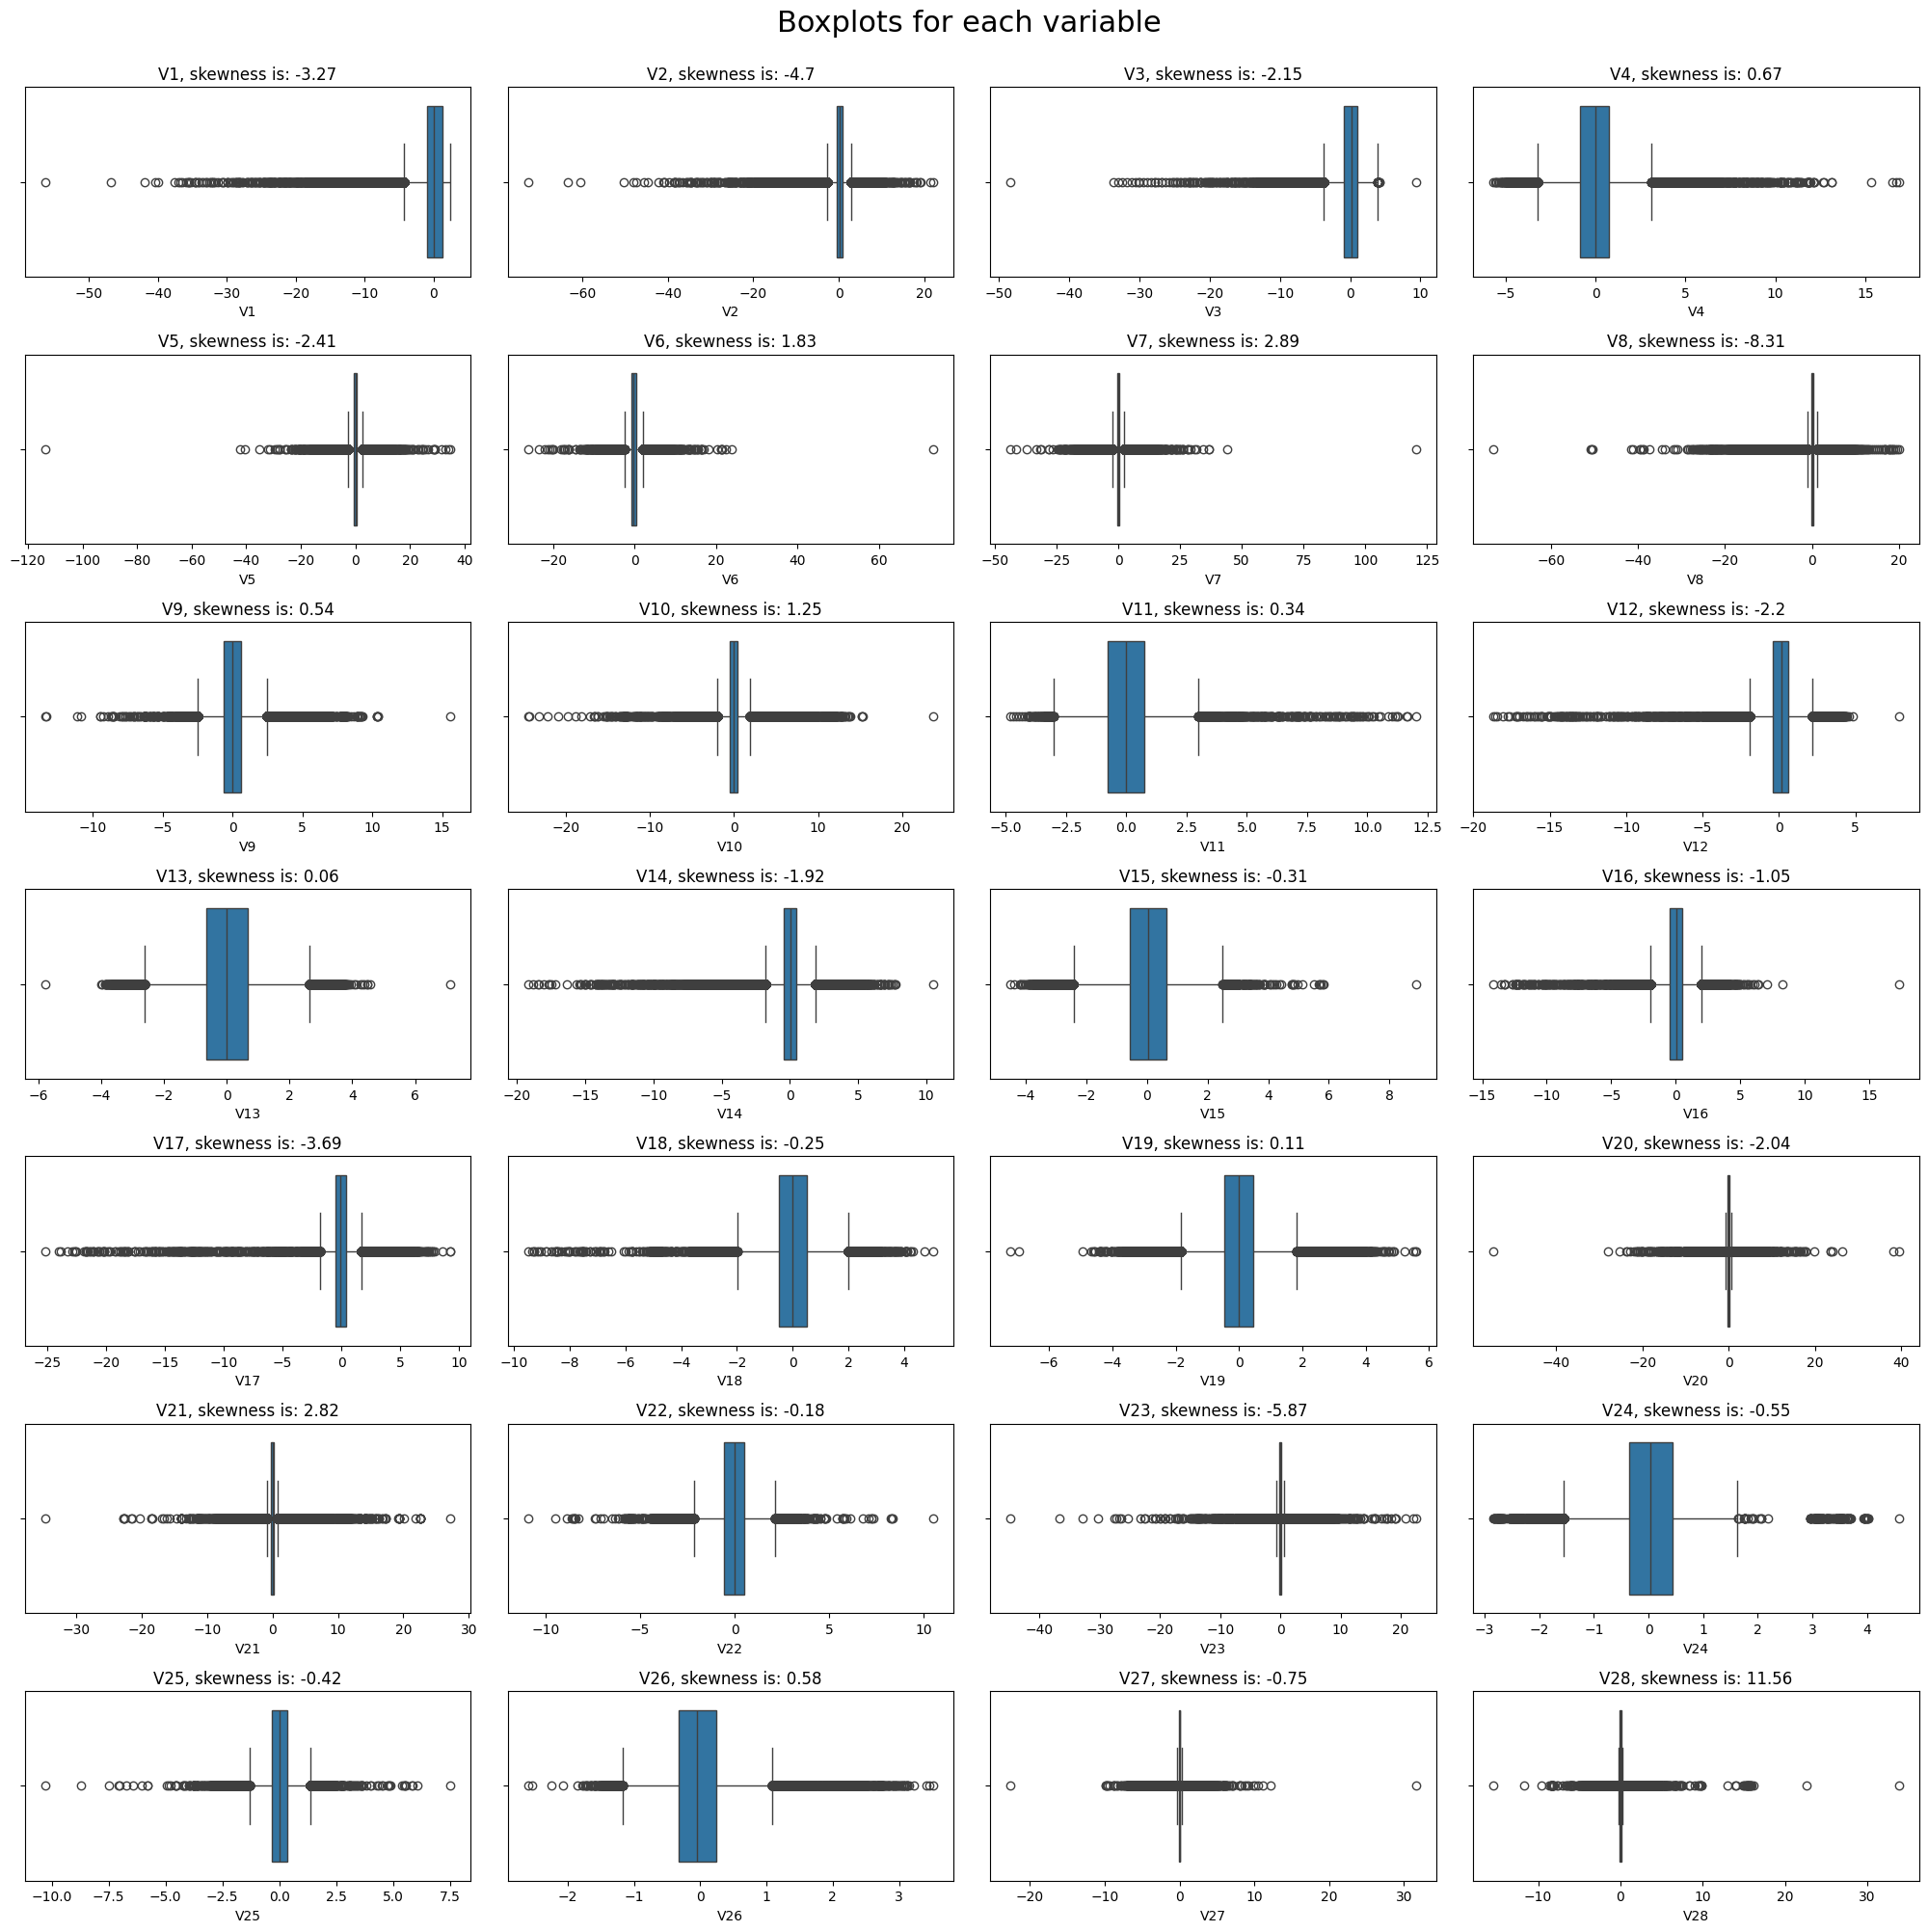

In [20]:
numeric_columns = (list(Data.loc[:, 'V1':'V28']))

def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey = True, figsize = (20, 20))
    fig.suptitle(suptitle,y = 1, size = 22)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data = dataset[data], orient = 'h', ax = axs[i])
        axs[i].set_title(data + ', skewness is: '+ str(round(dataset[data].skew(axis = 0, skipna = True), 2)))
        
boxplots_custom(dataset = Data, columns_list = numeric_columns, rows = 7, cols = 4, suptitle = 'Boxplots for each variable')
plt.tight_layout()

> ### As it is clear, there are a lot of outliers in the dataset. Removing them is not at all rational and a smart thing to do, because it can definitely have a negative impact on the results and decision-making, especially since the dataset is related to financial transactions.

Class
0    283253
1       473
Name: count, dtype: int64

Normal percentage is 99.83% 
Fraud percentage is 0.17% 


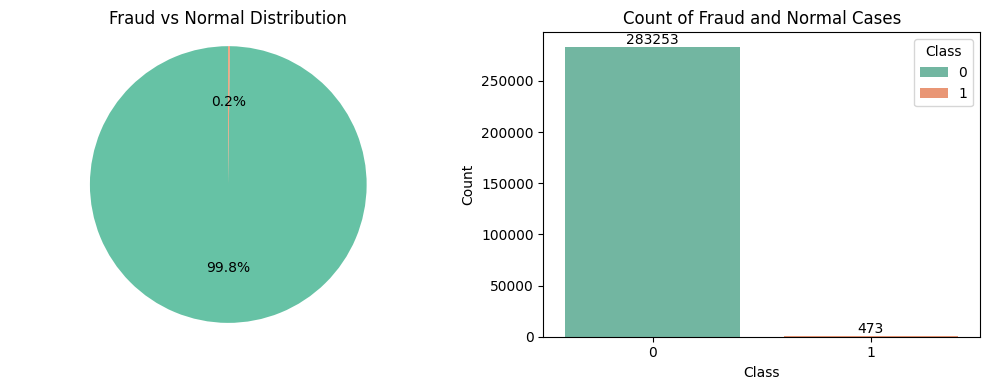

In [21]:
# Count occurrences of each class
Count = Data["Class"].value_counts()

# Get counts for no fraud and fraud
Normal = Count.get(0, 0)
fraud = Count.get(1, 0)

# Calculate total count
Total_Count = Normal + fraud

# Calculate percentages
Normal_percent = ((Normal / Total_Count) * 100).round(2)
fraud_percent = ((fraud / Total_Count) * 100).round(2)

# Print counts and percentages
print(Count)
print(f"\nNormal percentage is {Normal_percent}% ")
print(f"Fraud percentage is {fraud_percent}% ")

# Prepare data for pie chart
percentage_data = [Normal_percent, fraud_percent]
labels = ["Normal", "Fraud"]
Color = sns.color_palette("Set2")

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize = (10, 4))  # 1 row, 2 columns

# Create pie chart on the first subplot
axes[0].pie(percentage_data, colors = Color, startangle = 90, autopct = "%1.1f%%")
axes[0].set_title("Fraud vs Normal Distribution")
axes[0].axis("equal")  # Equal aspect ratio ensures that pie chart is circular

# Create count plot on the second subplot
sns.countplot(x = "Class", data = Data, hue = "Class", palette = "Set2", ax = axes[1])
for i in axes[1].containers:
    axes[1].bar_label(i)
axes[1].set_title("Count of Fraud and Normal Cases")
axes[1].set_xlabel("Class")
axes[1].set_ylabel("Count")

# Adjust layout
plt.tight_layout()
plt.show()

> ### That is, the data is very unbalanced with respect to the target class variable. Notice how unbalanced our original dataset is! The majority of transactions are fraud-free. In using this data framework as the basis for predictive and analytical models, we may encounter a lot of errors and our algorithms may overfit because they “assume” that most transactions are not fraud.

> ### Dealing with an unbalanced dataset, especially in the context of credit fraud detection, requires careful consideration of different techniques to ensure that your model can effectively learn to identify the minority class (fraudulent transactions).

In [22]:
class_0 = Data.loc[Data["Class"] == 0]["Time"]
class_1 = Data.loc[Data["Class"] == 1]["Time"]

hist_data = [class_0, class_1]
group_labels = ["Normal", "Fraud"]

fig = ff.create_distplot(hist_data, group_labels, show_hist = False, show_rug = False)
fig["layout"].update(title = "Credit Card Transactions Time Density Plot", xaxis = dict(title = "Time [s]"))
iplot(fig, filename = "dist_only")

Fraud
count       473.000000
mean      80450.507812
std       48636.179688
min         406.000000
25%       41203.000000
50%       73408.000000
75%      129095.000000
max      170348.000000
Name: Time, dtype: float64

Normal
count    283253.000000
mean      94835.054688
std       47475.550781
min           0.000000
25%       54233.000000
50%       84711.000000
75%      139308.000000
max      172792.000000
Name: Time, dtype: float64


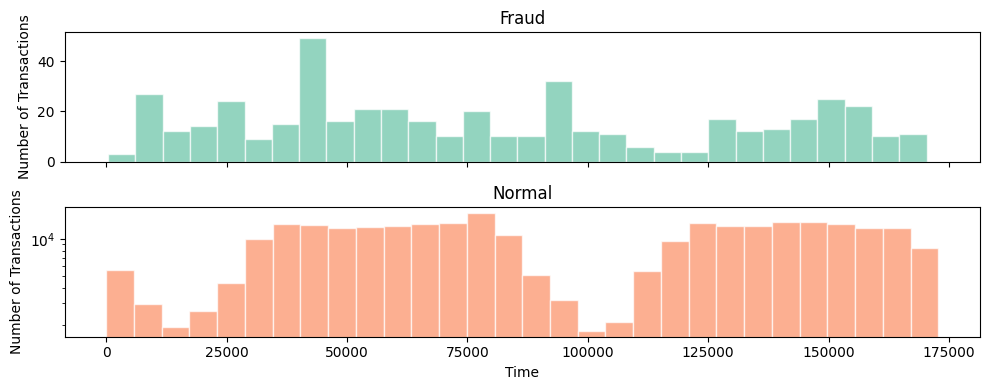

In [35]:
# Print descriptive statistics for Fraud and Normal transactions
print("Fraud")
print(Data.Time[Data.Class == 1].describe())
print()
print("Normal")
print(Data.Time[Data.Class == 0].describe())

# Create subplots for histograms
f, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize = (10, 4))
Colors = sns.color_palette("Set2")

bins = 30

# Histogram for Fraud transactions
ax1.hist(Data.Time[Data.Class == 1], bins = bins, color = Colors[0], alpha = 0.7, edgecolor = "white")
ax1.set_title("Fraud")
ax1.set_ylabel("Number of Transactions")

# Histogram for Normal transactions
ax2.hist(Data.Time[Data.Class == 0], bins = bins, color = Colors[1], alpha = 0.7, edgecolor = "white")
ax2.set_title("Normal")
ax2.set_ylabel("Number of Transactions")

# Set common x-label and y-scale
plt.xlabel("Time")
plt.yscale("log")  # Logarithmic scale for better visibility of counts
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

> ### Normal mean > Fraud mean
> ### Normal std < Fraud std
> ### Normal q1,q2,q3,q4 > Fraud q1,q2,q3,q4

> ### Fraudulent transactions have a more uniform distribution than legitimate transactions, while normal transactions have a cyclical distribution. This can make it easier to detect a fraudulent transaction at an "off-peak" time.

Fraud
count     473.000000
mean      123.871864
std       260.211060
min         0.000000
25%         1.000000
50%         9.820000
75%       105.889999
max      2125.870117
Name: Amount, dtype: float64

Normal
count    283253.000000
mean         88.413582
std         250.379028
min           0.000000
25%           5.670000
50%          22.000000
75%          77.459999
max       25691.160156
Name: Amount, dtype: float64


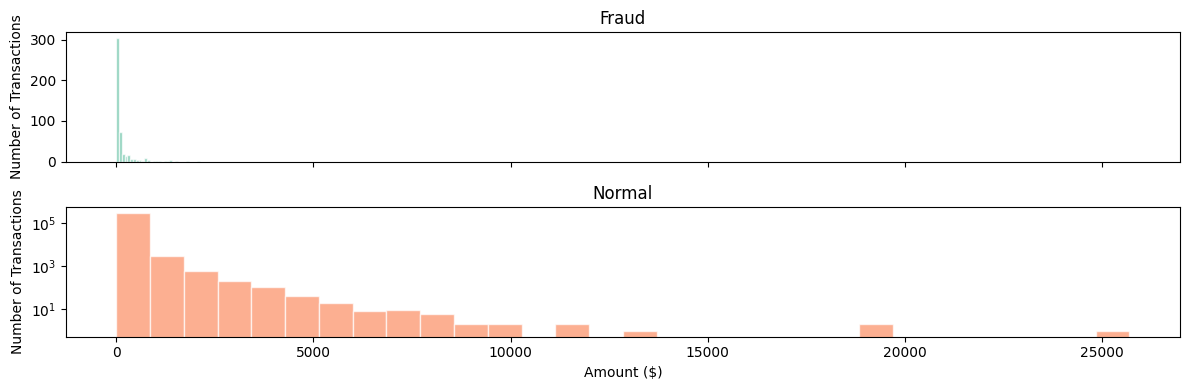

In [37]:
# Amount
# Print descriptive statistics for Fraud and Normal transactions
print("Fraud")
print(Data.Amount[Data.Class == 1].describe())
print()
print("Normal")
print(Data.Amount[Data.Class == 0].describe())

# Create subplots for histograms
f, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize = (12, 4))
Colors = sns.color_palette("Set2")

bins = 30

# Histogram for Fraud transactions
ax1.hist(Data.Amount[Data.Class == 1], bins = bins, color = Colors[0], alpha = 0.7, edgecolor = "white")
ax1.set_title("Fraud")
ax1.set_ylabel("Number of Transactions")

# Histogram for Normal transactions
ax2.hist(Data.Amount[Data.Class == 0], bins = bins, color = Colors[1], alpha = 0.7, edgecolor = "white")
ax2.set_title("Normal")
ax2.set_ylabel("Number of Transactions")

# Set common x-label and y-scale
plt.xlabel("Amount ($)")
plt.yscale("log")  # Logarithmic scale for better visibility of counts
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

> ### Normal mean < Fraud mean
> ### Normal std < Fraud std
> ### Normal q1,q2,q4 > Fraud q1,q2,q4
> ### Normal q3 < Fraud q3

> ### Most transactions are for small amounts, less than 100.

> ### Now let's move on to comparing time and amount.

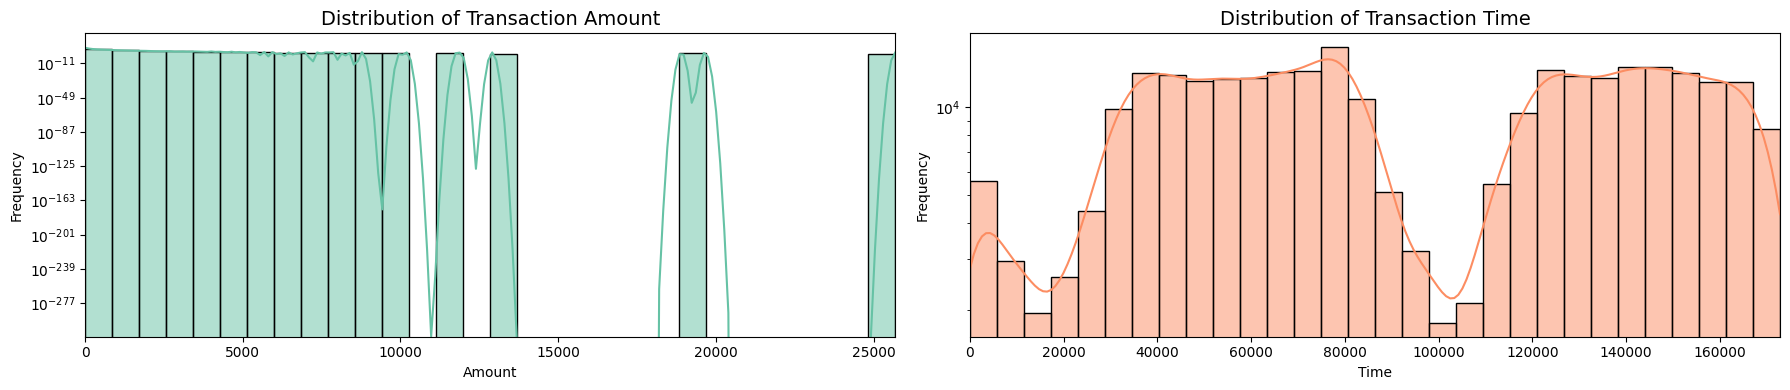

In [47]:
# Create a figure with subplots
fig, ax = plt.subplots(1, 2, figsize = (18, 4))
Colors = sns.color_palette("Set2")

# Get values for Amount and Time
amount_val = Data["Amount"].values
time_val = Data["Time"].values

# Plot distribution of Transaction Amount
sns.histplot(amount_val, ax = ax[0], color = Colors[0], kde = True, bins = 30)
ax[0].set_title("Distribution of Transaction Amount", fontsize = 14)
ax[0].set_xlim([min(amount_val), max(amount_val)])
ax[0].set_xlabel("Amount")
ax[0].set_ylabel("Frequency")
ax[0].set_yscale("log")

# Plot distribution of Transaction Time
sns.histplot(time_val, ax = ax[1], color = Colors[1], kde = True, bins = 30)
ax[1].set_title("Distribution of Transaction Time", fontsize = 14)
ax[1].set_xlim([min(time_val), max(time_val)])
ax[1].set_xlabel("Time")
ax[1].set_ylabel("Frequency")
ax[1].set_yscale("log")

# Show the plots
plt.tight_layout()
plt.show()

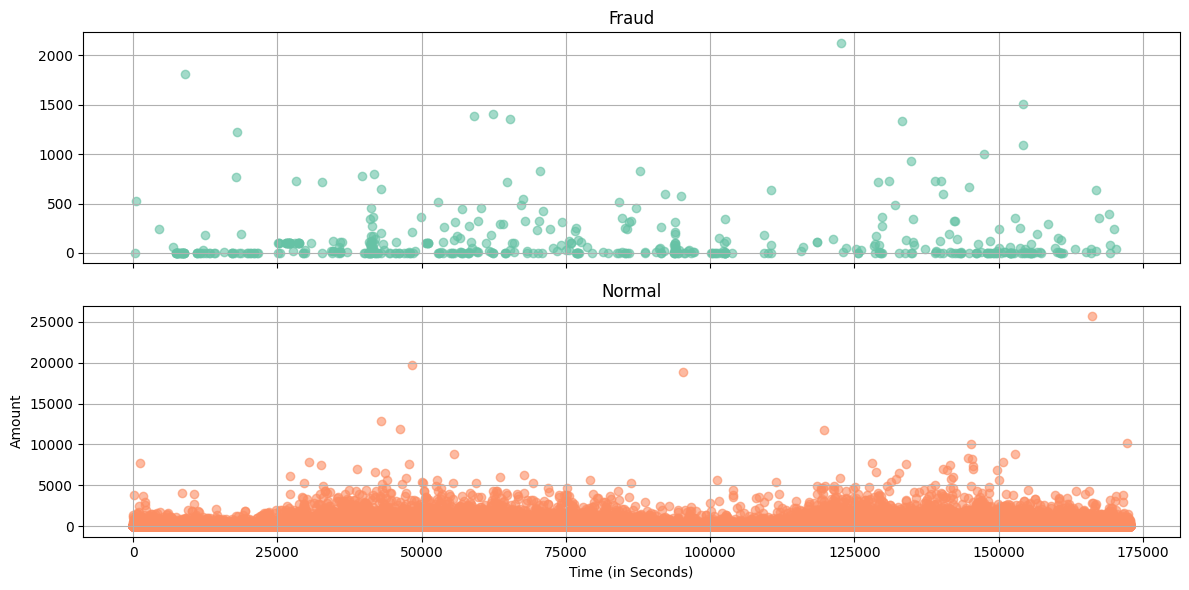

In [48]:
# Create subplots for scatter plots
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize = (12, 6))
Colors = sns.color_palette("Set2")

# Scatter plot for Fraud transactions
ax1.scatter(Data.Time[Data.Class == 1], Data.Amount[Data.Class == 1], color = Colors[0], alpha = 0.6, marker = 'o')
ax1.set_title("Fraud")
ax1.grid(True)  # Add grid lines for better visibility

# Scatter plot for Normal transactions
ax2.scatter(Data.Time[Data.Class == 0], Data.Amount[Data.Class == 0], color = Colors[1], alpha = 0.6, marker = 'o')
ax2.set_title("Normal")
ax2.grid(True)  # Add grid lines for better visibility

# Set common x and y labels
plt.xlabel("Time (in Seconds)")
plt.ylabel("Amount")
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [54]:
Colors = sns.color_palette("Set2")
fraud = Data.loc[Data["Class"] == 1]

trace = go.Scatter(
    x = fraud["Time"], y = fraud["Amount"],
    name = "Amount",
     marker = dict(
                color = Colors,
                line = dict(
                    color = Colors,
                    width = 1),
                opacity = 0.5,
            ),
    text = fraud["Amount"],
    mode = "markers"
)
data = [trace]
layout = dict(title = "Amount of fraudulent transactions",
          xaxis = dict(title = "Time [s]", showticklabels = True), 
          yaxis = dict(title = "Amount"),
          hovermode = "closest"
         )
fig = dict(data = data, layout = layout)
iplot(fig, filename = "fraud-amount")

In [58]:
Data2 = Data.copy()

Data2["Hour"] = Data2["Time"].apply(lambda x: np.floor(x / 3600))

tmp = Data2.groupby(["Hour", "Class"])["Amount"].aggregate(["min", "max", "count", "sum", "mean", "median", "var"]).reset_index()
df = pd.DataFrame(tmp)
df.columns = ["Hour", "Class", "Min", "Max", "Transactions", "Sum", "Mean", "Median", "Var"]
df

,Hour,Class,Min,Max,Transactions,Sum,Mean,Median,Var
0,0.0,0,0.00,7712.430176,3929,255825.953125,65.112228,12.990000,45961.832031
1,0.0,1,0.00,529.000000,2,529.000000,264.500000,264.500000,139920.500000
2,1.0,0,0.00,1769.689941,2211,145744.593750,65.917953,23.000000,20085.310547
3,1.0,1,59.00,239.929993,2,298.929993,149.464996,149.464996,16367.831055
4,2.0,0,0.00,4002.879883,1552,106983.390625,68.932594,17.985001,45434.496094
...,...,...,...,...,...,...,...,...,...
89,45.0,1,12.31,39.980000,2,52.290001,26.145000,26.145000,382.814423
90,46.0,0,0.00,25691.160156,6429,448494.718750,69.761192,15.000000,132854.750000
91,46.0,1,0.00,634.299988,6,1433.229980,238.871658,194.489990,67185.054688
92,47.0,0,0.00,10199.440430,4824,332456.593750,68.917206,14.014999,56434.578125


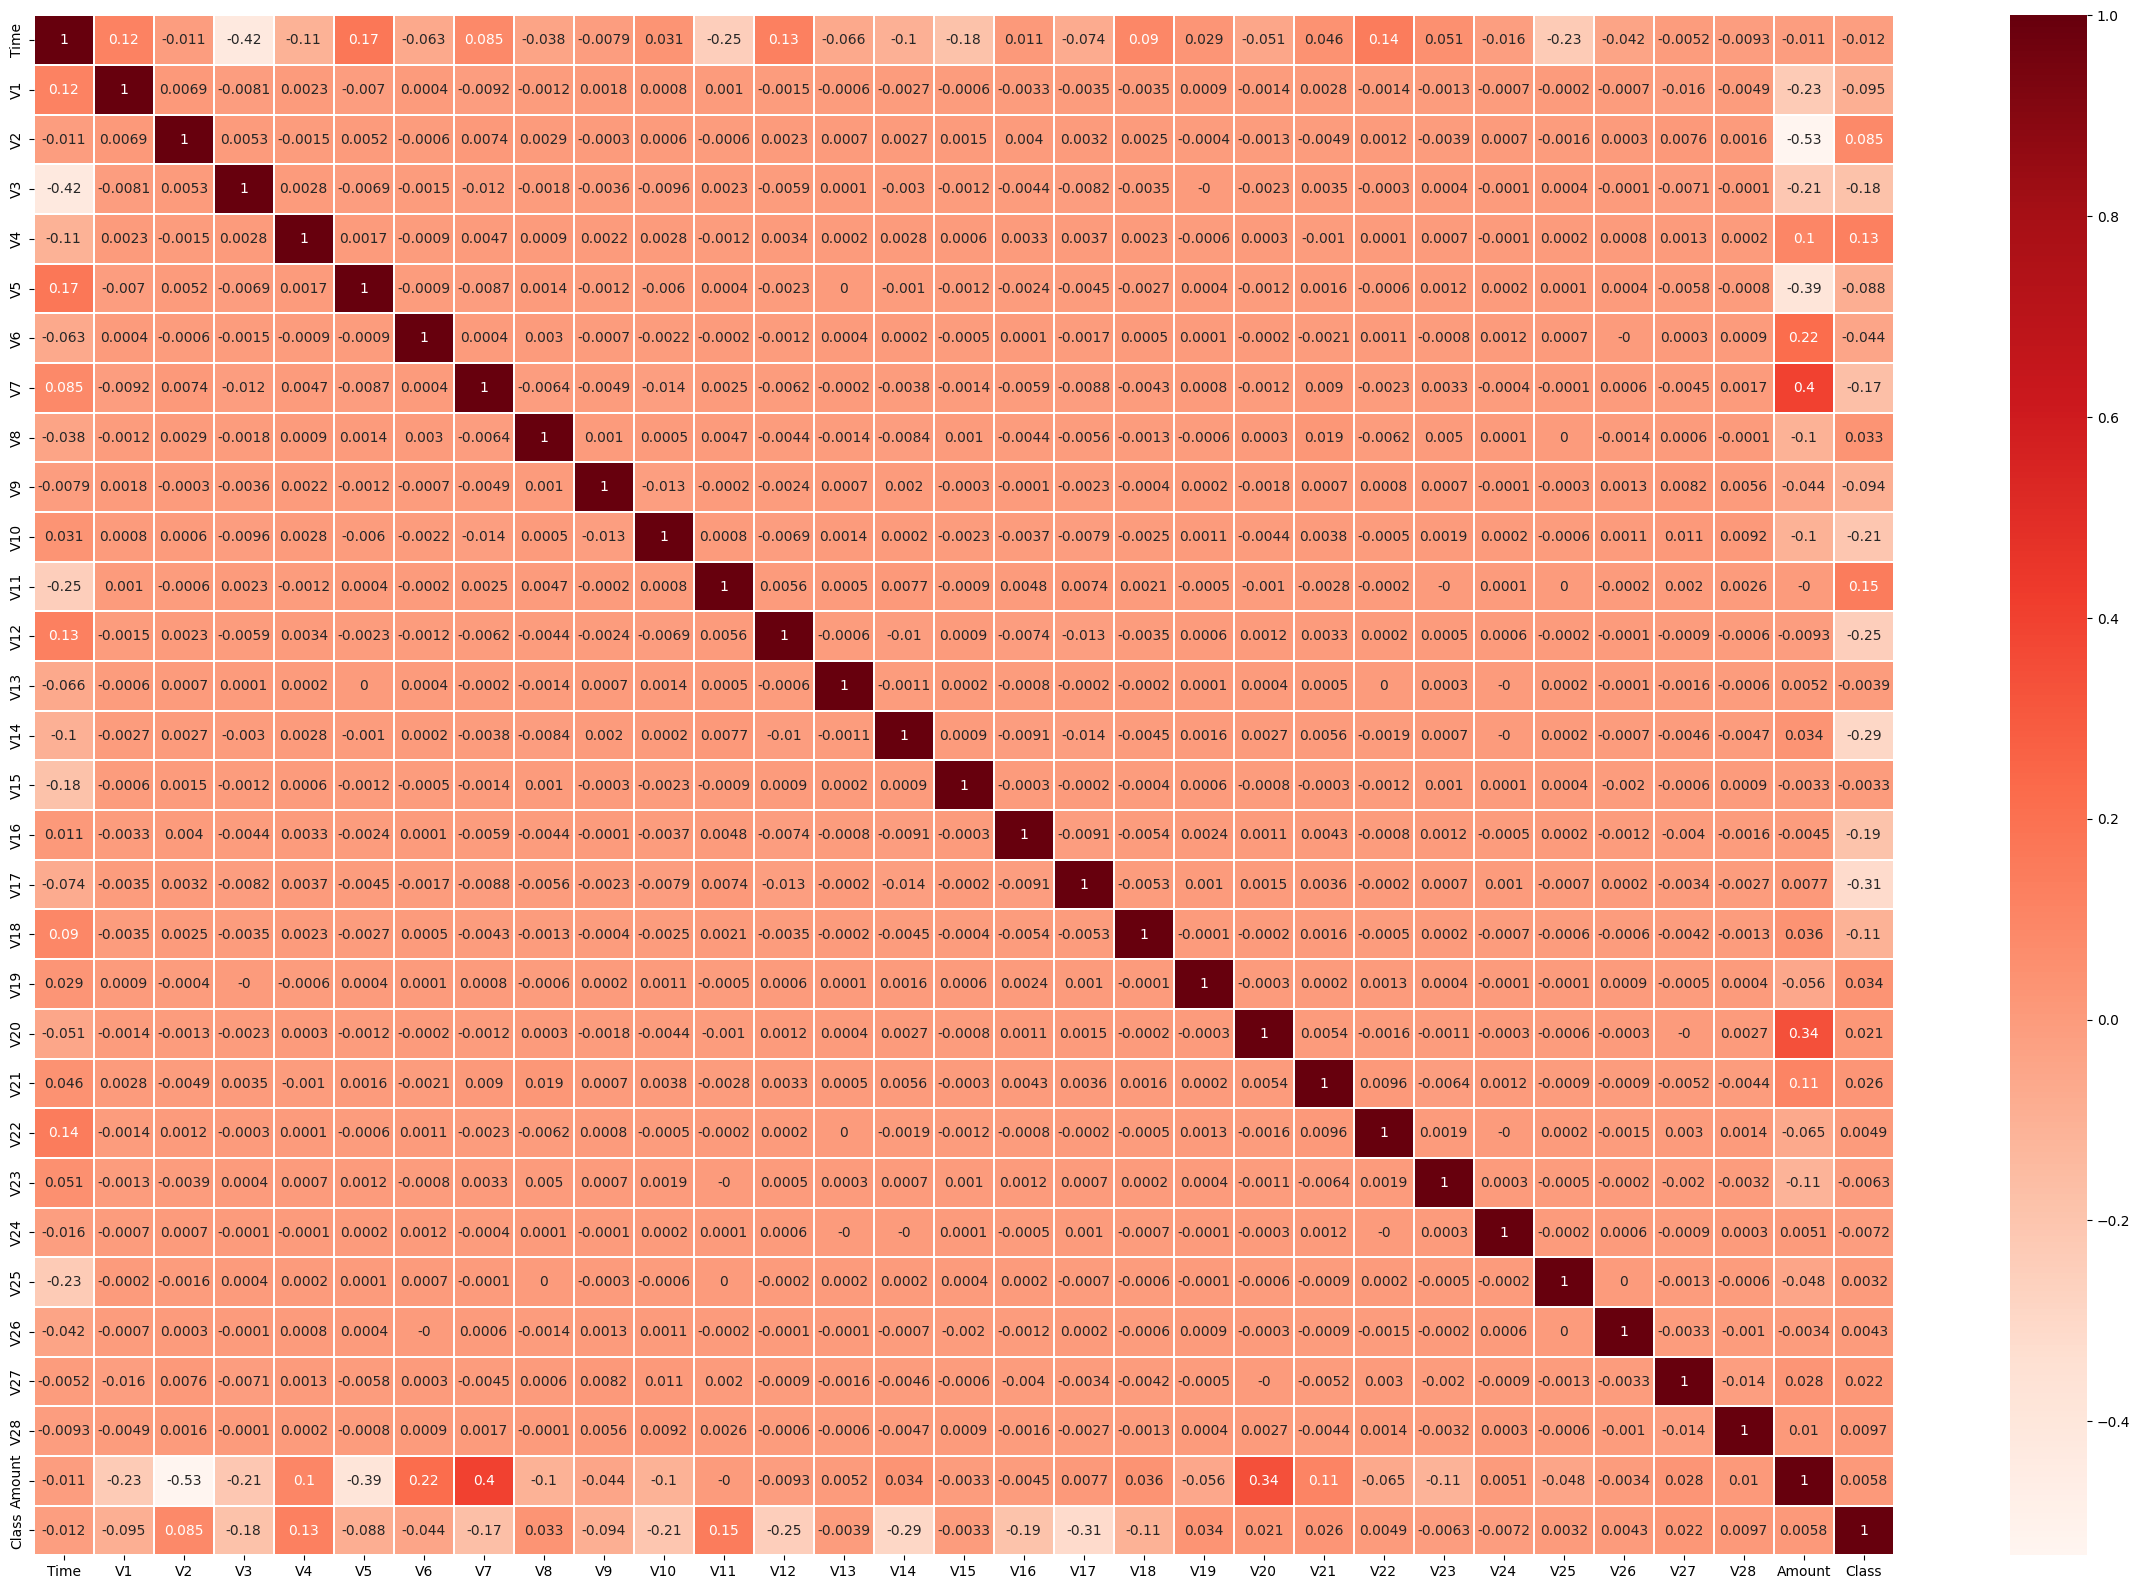

In [59]:
plt.figure(figsize = (30, 20))
corr = Data.corr()
M = np.triu(np.ones_like(corr, dtype = bool))
rounded_corr = corr.round(4)

sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, annot = rounded_corr,  linewidths = .1, cmap = "Reds")

plt.show()

> ### Amound have Inverse correlation with V2 and V5 and Direct correlation with V7 and V20
> ### Inverse correlation with V3 and Time

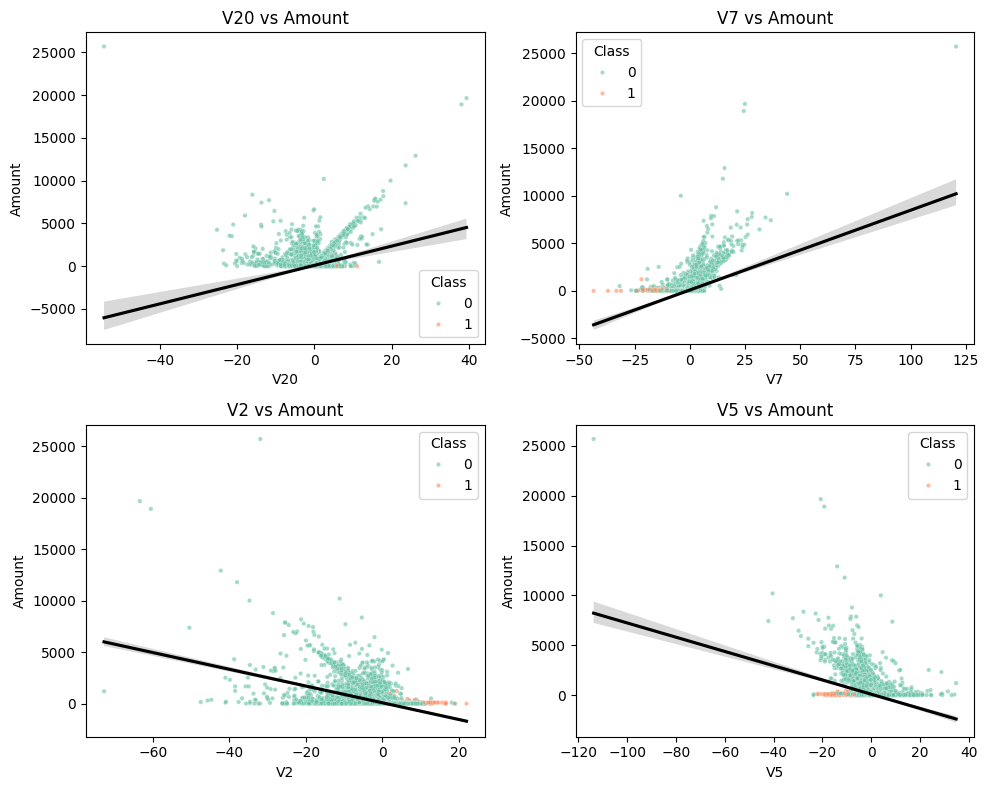

In [ ]:
Data_sampled = Data.sample(frac = 0.8, random_state = 42)  # Sample 80% of the data

# Create a 2x2 grid for multiple plots
fig, axes = plt.subplots(2, 2, figsize = (10, 8))  # Adjusted figsize for better visibility

# Define a color palette with only two colors
palette = sns.color_palette("Set2", n_colors = 2)  # Limit to 2 colors

# Plot for V20
sns.scatterplot(x = "V20", y = "Amount", data = Data_sampled, ax = axes[0, 0], hue = "Class", palette = palette, s = 10, alpha = 0.6)
sns.regplot(x = "V20", y = "Amount", data = Data_sampled, ax = axes[0, 0], scatter = False, color = "black")
axes[0, 0].set_title("V20 vs Amount")
axes[0, 0].set_xlabel("V20")
axes[0, 0].set_ylabel("Amount")

# Plot for V7
sns.scatterplot(x = "V7", y = "Amount", data = Data_sampled, ax = axes[0, 1], hue = "Class", palette = palette, s = 10, alpha = 0.6)
sns.regplot(x = "V7", y = "Amount", data = Data_sampled, ax = axes[0, 1], scatter = False, color = "black")
axes[0, 1].set_title("V7 vs Amount")
axes[0, 1].set_xlabel("V7")
axes[0, 1].set_ylabel("Amount")

# Plot for V2
sns.scatterplot(x = "V2", y = "Amount", data = Data_sampled, ax = axes[1, 0], hue = "Class", palette = palette, s = 10, alpha = 0.6)
sns.regplot(x = "V2", y = "Amount", data = Data_sampled, ax = axes[1, 0], scatter = False, color = "black")
axes[1, 0].set_title("V2 vs Amount")
axes[1, 0].set_xlabel("V2")
axes[1, 0].set_ylabel("Amount")

# Plot for V5
sns.scatterplot(x = "V5", y = "Amount", data = Data_sampled, ax = axes[1, 1], hue = "Class", palette = palette, s = 10, alpha = 0.6)
sns.regplot(x = "V5", y = "Amount", data = Data_sampled, ax = axes[1, 1], scatter = False, color = "black")
axes[1, 1].set_title("V5 vs Amount")
axes[1, 1].set_xlabel("V5")
axes[1, 1].set_ylabel("Amount")

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

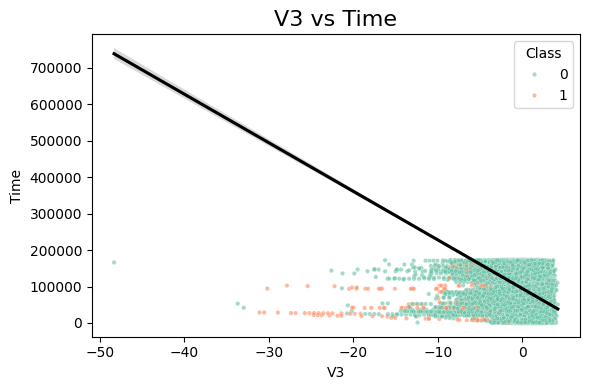

In [69]:
Data_sampled = Data.sample(frac = 0.8, random_state = 42)  # Sample 80% of the data

# Create a figure for the plot
plt.figure(figsize = (6, 4))

# Define a color palette with only two colors
palette = sns.color_palette("Set2", n_colors = 2)  # Limit to 2 colors

# Create the scatter plot for V3 vs Time
sns.scatterplot(x = "V3", y = "Time", data = Data_sampled, hue = "Class", palette = palette, s = 10, alpha = 0.6)

# Add the regression line
sns.regplot(x = "V3", y = "Time", data = Data_sampled, scatter = False, color = "black")

# Set titles and labels
plt.title("V3 vs Time", fontsize = 16)
plt.xlabel("V3")
plt.ylabel("Time")

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

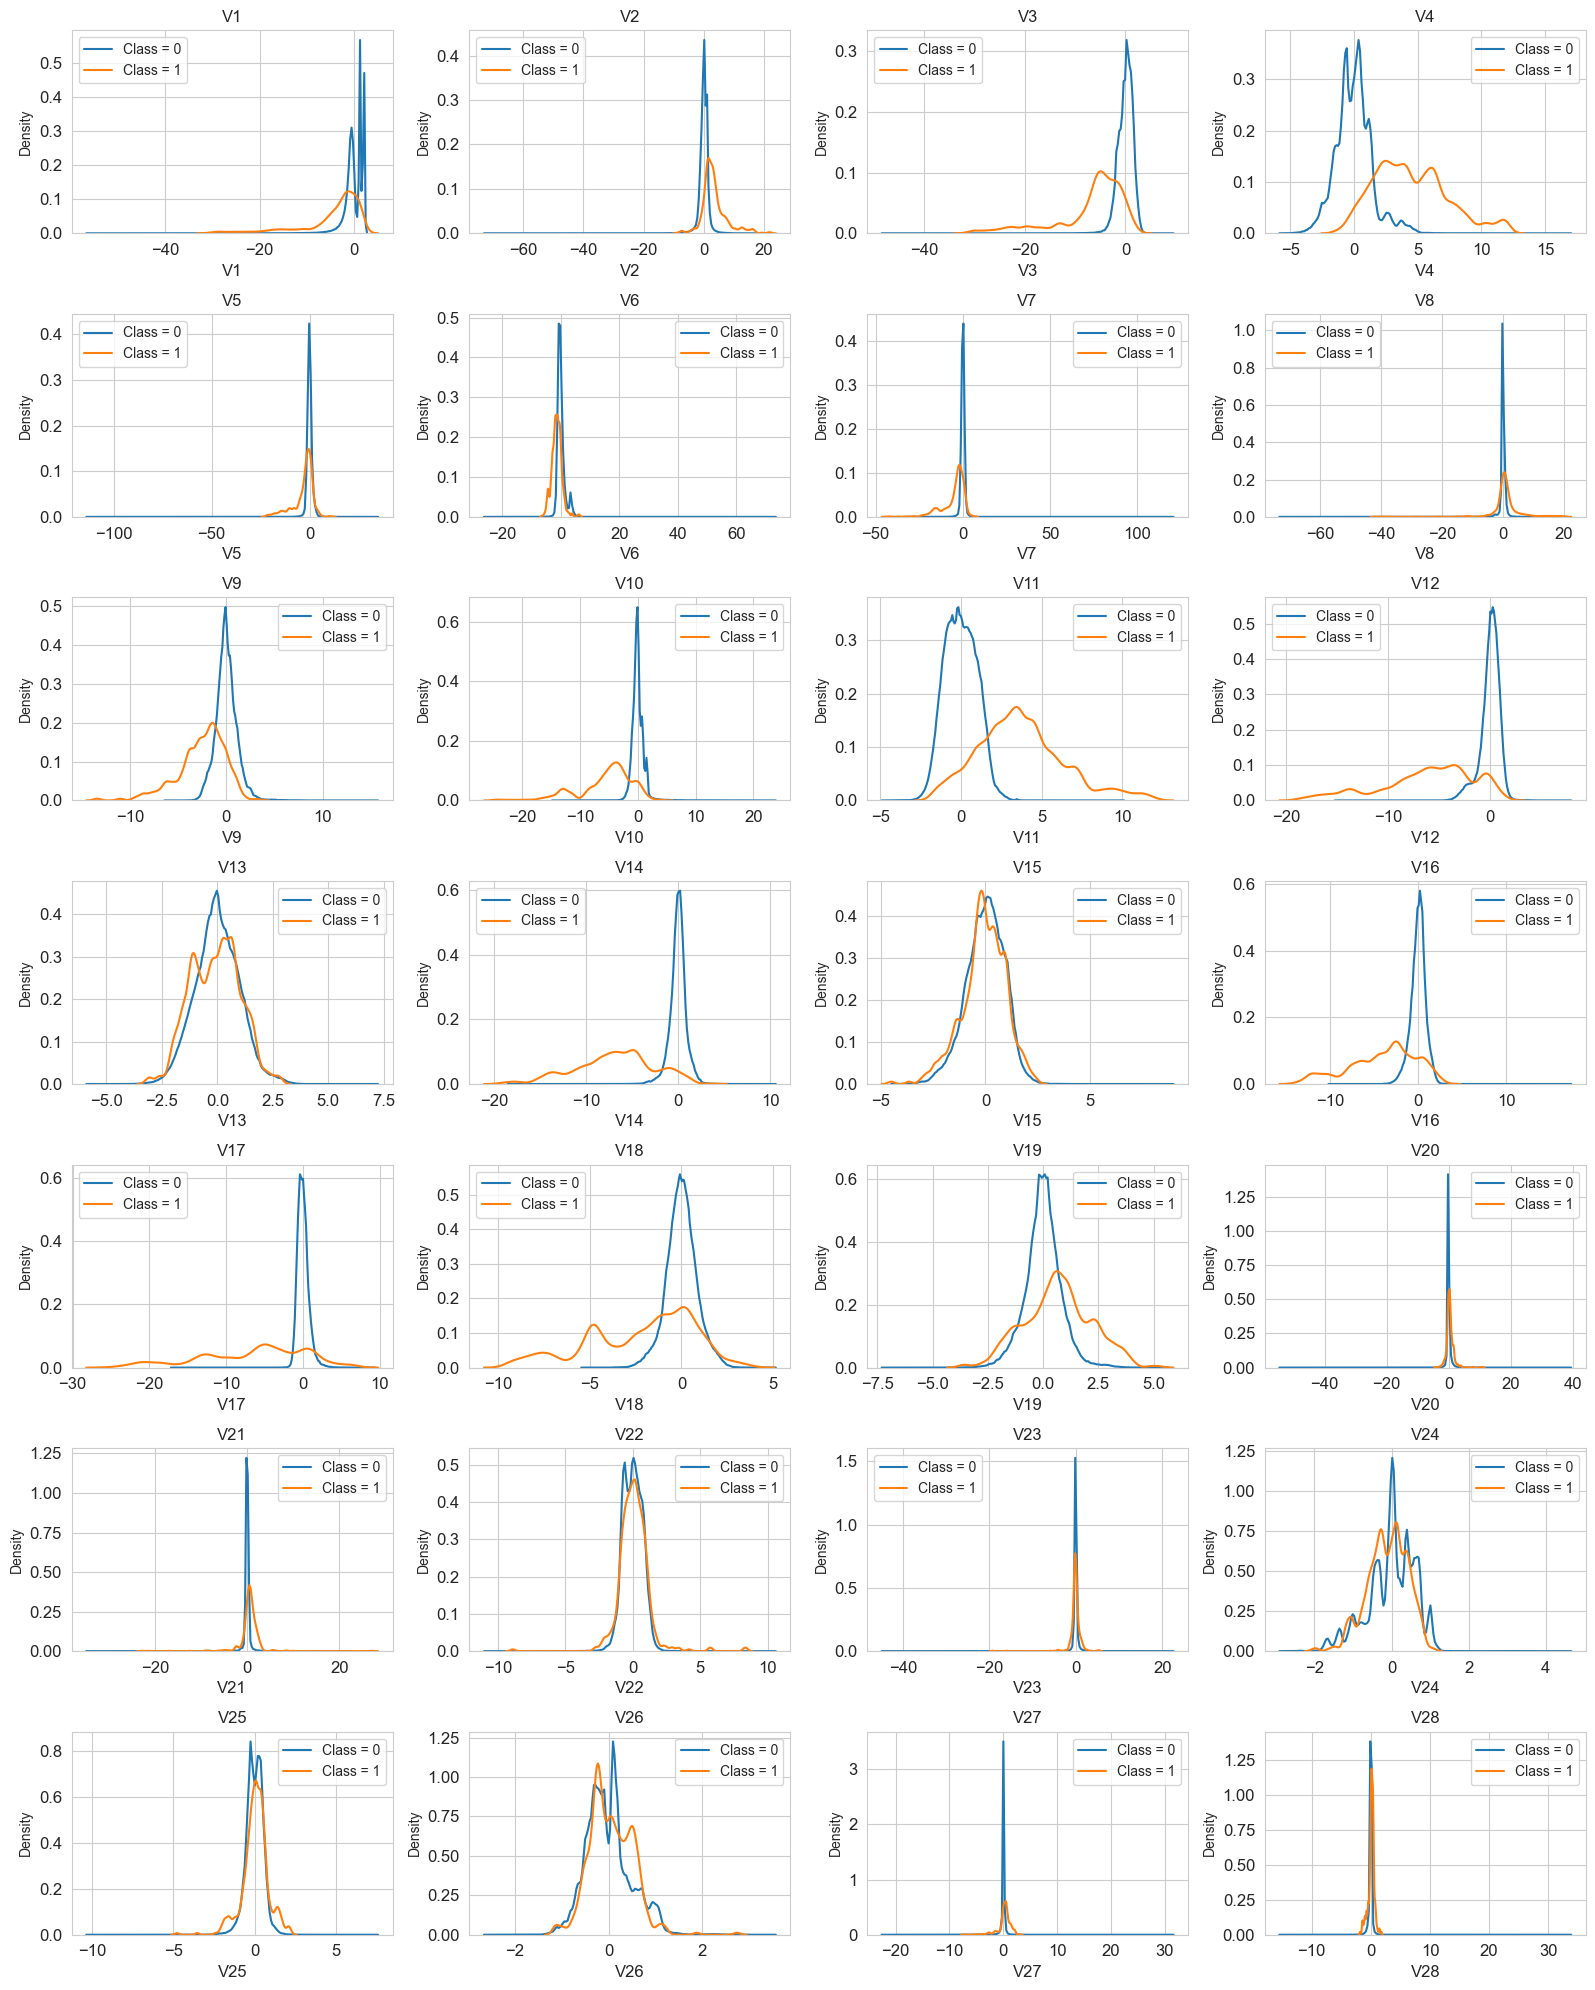

In [70]:
# Assuming Data is already defined and contains the necessary columns
# var = Data.columns.values  # This line is redundant
var = Data.iloc[:, 1:29].columns  # Select features from column 1 to 28

# Separate the data by class
t0 = Data.loc[Data["Class"] == 0]
t1 = Data.loc[Data["Class"] == 1]

# Set the style for the plots
sns.set_style("whitegrid")

# Create a grid of subplots
fig, ax = plt.subplots(7, 4, figsize = (16, 20))

# Loop through each feature and create a KDE plot
for i, feature in enumerate(var):
    row = i // 4
    col = i % 4
    
    # Check for zero variance
    if t0[feature].nunique() > 1 and t1[feature].nunique() > 1:
        sns.kdeplot(t0[feature], bw_adjust = 0.5, label = "Class = 0", ax = ax[row, col], warn_singular = False)
        sns.kdeplot(t1[feature], bw_adjust = 0.5, label = "Class = 1", ax = ax[row, col], warn_singular = False)
        ax[row, col].set_title(feature, fontsize = 12)
        ax[row, col].set_xlabel(feature, fontsize = 12)
        ax[row, col].tick_params(axis = "both", which = "major", labelsize = 12)
        ax[row, col].legend()
    else:
        ax[row, col].set_title(f"{feature} (Constant)", fontsize = 12)
        ax[row, col].set_xlabel(feature, fontsize = 12)
        ax[row, col].tick_params(axis = "both", which = "major", labelsize = 12)

# Hide any unused subplots
for j in range(len(var), ax.size):
    ax.flatten()[j].axis("off")

# Adjust layout
plt.tight_layout()
plt.show()

> ### Except for time and cost, the feature distribution for legitimate transactions (class values ​​= 0) is centered around the 0 axis, while fraudulent transactions (class values ​​= 1) have an uneven (asymmetric) distribution.

> ## 5. Data Pro-processing

> ### Due to the presence of a lot of outliers and imbalanced data, we use RobustScaler(), which is not sensitive to outliers, for normalization to reduce the effects of outliers.

In [71]:
X = Data.drop(columns = ["Class"])  # Feature variables
y = Data["Class"]                   # Target variable

# Split the original dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalization with RoboScaler()
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [72]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))
print(len(X_train_scaled))
print(len(X_test_scaled))

226980
226980
56746
56746
226980
56746


> ### Due to the imbalanced data set, we need to balance the data to train machine learning models.

> ### Tomek Links : To remove majority class noise
> ### SMOTE / ADASYN : To increase minority class samples

In [ ]:
# Data balancing methods
sampling_methods = {
    "Tomek Links": TomekLinks(),
    "SMOTE": SMOTE(sampling_strategy = 0.8, random_state = 42),
    "ADASYN": ADASYN(sampling_strategy = 0.8, random_state = 42),
    "SMOTETomek": SMOTETomek(sampling_strategy = 0.8, random_state = 42),
    "ADASYN + Tomek Links": None,
    "SMOTE + Tomek Links": None,
    "ADASYN + SMOTE": None
}

models = {
    "Random Forest": RandomForestClassifier(n_estimators = 100, max_depth = 30, random_state = 42),
    "XGBoost": XGBClassifier(eval_metric = "logloss", n_estimators = 100, max_depth = 10, random_state = 42)
}

> ### Do not use precision score as a metric with unbalanced datasets (it will usually be high and misleading). Instead, use f1 score, recall score, or confusion matrix.

In [78]:
# Evaluate the model
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Fit the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Check for support of probability before prediction
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]  # Positive class probability
    else:
        y_prob = np.zeros_like(y_test, dtype = float)  # Default value if probability is not supported

    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_prob)

    # Perform cross-validation for AUC-ROC
    auc_roc_cv_scores = cross_val_score(model, X_train, y_train, cv = 3, scoring = "roc_auc")
    mean_auc_roc = auc_roc_cv_scores.mean()
    std_auc_roc = auc_roc_cv_scores.std()

    return f1, precision, recall, auc_roc, mean_auc_roc, std_auc_roc

In [79]:
# Save the results
results = {"Sampling Method": [], "Model": [], "F1 Score": [], "Precision": [], "Recall": [], "AUC-ROC": [], "Mean AUC-ROC": [], "Std AUC-ROC": []}

# In the balanced data evaluation loop:
for method_name, sampler in sampling_methods.items():
    if method_name == "ADASYN + Tomek Links":
        X_adasyn, y_adasyn = ADASYN(sampling_strategy = 1, random_state = 42).fit_resample(X_train_scaled, y_train)
        X_resampled, y_resampled = TomekLinks().fit_resample(X_adasyn, y_adasyn)
        X_ADA_Tomek = X_resampled
    elif method_name == "SMOTE + Tomek Links":
        X_smote, y_smote = SMOTE(sampling_strategy = 1, random_state = 42).fit_resample(X_train_scaled, y_train)
        X_resampled, y_resampled = TomekLinks().fit_resample(X_smote, y_smote)
        X_SMO_Tomek = X_resampled
    elif method_name == "ADASYN + SMOTE":
        X_adasyn_smote, y_adasyn_smote = X_adasyn, y_adasyn
        X_resampled, y_resampled = SMOTE(sampling_strategy = 1, random_state = 42).fit_resample(X_adasyn_smote, y_adasyn_smote)
        X_Ada_Smo = X_resampled
    else:
        X_resampled, y_resampled = sampler.fit_resample(X_train_scaled, y_train)
    
    for model_name, model in models.items():
        f1, precision, recall, auc_roc, mean_auc_roc, std_auc_roc = evaluate_model(model, X_resampled, y_resampled, X_test_scaled, y_test)
        results["Sampling Method"].append(method_name)
        results["Model"].append(model_name)
        results["F1 Score"].append(f1)
        results["Precision"].append(precision)
        results["Recall"].append(recall)
        results["AUC-ROC"].append(auc_roc)
        results["Mean AUC-ROC"].append(mean_auc_roc)
        results["Std AUC-ROC"].append(std_auc_roc)

In [80]:
# Show results
results_df = pd.DataFrame(results)
results_df.sort_values(by = "F1 Score", ascending = False)

,Sampling Method,Model,F1 Score,Precision,Recall,AUC-ROC,Mean AUC-ROC,Std AUC-ROC
1,Tomek Links,XGBoost,0.857143,0.986301,0.757895,0.970569,0.978420,0.004346
0,Tomek Links,Random Forest,0.843373,0.985915,0.736842,0.924389,0.941543,0.014784
2,SMOTE,Random Forest,0.839080,0.924051,0.768421,0.967916,0.999995,0.000004
6,SMOTETomek,Random Forest,0.839080,0.924051,0.768421,0.967916,0.999995,0.000004
7,SMOTETomek,XGBoost,0.835165,0.873563,0.800000,0.967083,0.999989,0.000007
3,SMOTE,XGBoost,0.835165,0.873563,0.800000,0.967083,0.999989,0.000007
10,SMOTE + Tomek Links,Random Forest,0.831461,0.891566,0.778947,0.965423,0.999994,0.000007
5,ADASYN,XGBoost,0.810811,0.833333,0.789474,0.966918,0.998392,0.001757
11,SMOTE + Tomek Links,XGBoost,0.810811,0.833333,0.789474,0.977104,0.999989,0.000004
9,ADASYN + Tomek Links,XGBoost,0.804233,0.808511,0.800000,0.972986,0.998498,0.001612


In [81]:
# Find the maximum values
max_f1 = results_df["F1 Score"].max().round(6)
max_pre = results_df["Precision"].max().round(6)
max_re = results_df["Recall"].max().round(6)
max_auc = results_df["AUC-ROC"].max().round(6)
max_mean = results_df["Mean AUC-ROC"].max().round(6) 
min_std = results_df["Std AUC-ROC"].min().round(6) 

# Find the Methods with the highest scores
best_method_f1 = results_df.loc[results_df["F1 Score"].idxmax(), "Sampling Method"]
best_method_pre = results_df.loc[results_df["Precision"].idxmax(), "Sampling Method"]
best_method_re = results_df.loc[results_df["Recall"].idxmax(), "Sampling Method"]
best_method_auc = results_df.loc[results_df["AUC-ROC"].idxmax(), "Sampling Method"]
best_method_mean = results_df.loc[results_df["Mean AUC-ROC"].idxmax(), "Sampling Method"]
best_method_std = results_df.loc[results_df["Std AUC-ROC"].idxmin(), "Sampling Method"]

# Print the results
print("The Sampling Method, {} has the highest F1 Score with {:.5f}".format(best_method_f1, max_f1))
print("The Sampling Method, {} has the highest Precision Score with {:.5f}".format(best_method_pre, max_pre))
print("The Sampling Method, {} has the highest Recall Score with {:.5f}".format(best_method_re, max_re))
print("The Sampling Method, {} has the highest AUC-ROC Score with {:.5f}".format(best_method_auc, max_auc))
print("The Sampling Method, {} has the highest Mean Score with {:.5f}".format(best_method_mean, max_mean))
print("The Sampling Method, {} has the lowest STD Score with {:.5f}".format(best_method_std, min_std))

The Sampling Method, Tomek Links has the highest F1 Score with 0.85714
The Sampling Method, Tomek Links has the highest Precision Score with 0.98630
The Sampling Method, SMOTE has the highest Recall Score with 0.80000
The Sampling Method, ADASYN has the highest AUC-ROC Score with 0.97897
The Sampling Method, SMOTE has the highest Mean Score with 0.99999
The Sampling Method, SMOTE has the lowest STD Score with 0.00000


> ### We chose SMOTE + Tomek Links among the balancing methods because they have much better balance and F1_Score is very important to us. Now, based on the method we chose for balancing, we move on to training the models.

> ## 6. Models training

In [82]:
# SMOTE + Tomek Links

X_smote, y_smote = SMOTE(sampling_strategy = 0.8, k_neighbors = 5, random_state = 42).fit_resample(X_train_scaled, y_train)
X_resampled, y_resampled = TomekLinks().fit_resample(X_smote, y_smote)

In [84]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators = 200, max_depth = 35, min_samples_split = 5, min_samples_leaf = 3, random_state = 42),
    "XGBoost": XGBClassifier(learning_rate = 0.1, n_estimators = 200, max_depth = 7, subsample = 0.8, colsample_bytree = 0.8, eval_metric = "logloss", random_state = 42),
    "LightGBM": LGBMClassifier(num_leaves = 40, learning_rate = 0.09, n_estimators = 200, force_col_wise = True, random_state = 42),
    "Logistic Regression": LogisticRegression(solver = "liblinear", class_weight = "balanced", random_state = 42),
    "KNN": KNeighborsClassifier(n_neighbors = 5, weights = "distance"),  # Reduced neighbors
    "Neural Network": MLPClassifier(hidden_layer_sizes = (120,), max_iter = 250, activation = "relu", random_state = 42)  # Reduced iterations
}

# Evaluating models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_prob = np.zeros_like(y_test, dtype = float)
    
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_prob)
    
    # Reduce cross-validation folds for speed
    auc_roc_cv_scores = cross_val_score(model, X_train, y_train, cv = 5, scoring = "roc_auc")  # Reduced cv
    mean_auc_roc = auc_roc_cv_scores.mean()
    std_auc_roc = auc_roc_cv_scores.std()
    
    return f1, precision, recall, auc_roc, mean_auc_roc, std_auc_roc

# Save results
results = {"Model": [], "F1 Score": [], "Precision": [], "Recall": [], "AUC-ROC": [], "Mean AUC-ROC": [], "Std AUC-ROC": []}

for model_name, model in models.items():
    f1, precision, recall, auc_roc, mean_auc_roc, std_auc_roc = evaluate_model(model, X_resampled, y_resampled, X_test_scaled, y_test)
    results["Model"].append(model_name)
    results["F1 Score"].append(f1)
    results["Precision"].append(precision)
    results["Recall"].append(recall)
    results["AUC-ROC"].append(auc_roc)
    results["Mean AUC-ROC"].append(mean_auc_roc)
    results["Std AUC-ROC"].append(std_auc_roc)

[LightGBM] [Info] Number of positive: 181281, number of negative: 226602
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 407883, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.444444 -> initscore=-0.223147
[LightGBM] [Info] Start training from score -0.223147
[LightGBM] [Info] Number of positive: 145025, number of negative: 181281
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 326306, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.444445 -> initscore=-0.223142
[LightGBM] [Info] Start training from score -0.223142
[LightGBM] [Info] Number of positive: 145025, number of negative: 181281
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 326306, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.444445 -> initscore=-0.223142
[LightGBM] [Info] Start training from score -0.22

In [ ]:
# Show results
results_df = pd.DataFrame(results)
results_df.sort_values(by = "F1 Score", ascending = False)

,Model,F1 Score,Precision,Recall,AUC-ROC,Mean AUC-ROC,Std AUC-ROC
0,Random Forest,0.837989,0.892857,0.789474,0.977539,0.999997,4.033686e-07
1,XGBoost,0.783505,0.767677,0.800000,0.973910,0.999990,3.295345e-06
5,Neural Network,0.751323,0.755319,0.747368,0.948314,0.999971,9.282256e-06
2,LightGBM,0.519573,0.392473,0.768421,0.933100,0.999965,4.630886e-05
4,KNN,0.490323,0.353488,0.800000,0.899177,0.999543,9.733997e-05
3,Logistic Regression,0.103234,0.054858,0.873684,0.960250,0.991433,3.154559e-04


> ### Hyperparameter review and optimization

In [87]:
# Define parameter grids for each model
param_grids = {
    "Random Forest": {
        "n_estimators": [100, 300],
        "max_depth": [10, 20],
        "min_samples_split": [2, 5],
        "min_samples_leaf": [1, 2]
    },
    #{'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
    "XGBoost": {
        "n_estimators": [100, 300],
        "learning_rate": [0.01, 0.1],
        "max_depth": [3, 6]
    },
    #{'n_estimators': 300, 'max_depth': 6, 'learning_rate': 0.1}
    "LightGBM": {
        "num_leaves": [20, 40],
        "learning_rate": [0.01, 0.09],
        "n_estimators": [100, 300]
    },
    #{'num_leaves': 40, 'n_estimators': 300, 'learning_rate': 0.09}
    "Logistic Regression": {
        "C": [0.1, 1, 10],
        "solver": ["liblinear"]
    },
    #{'solver': 'liblinear', 'C': 1}
    "KNN": {
        "n_neighbors": [3, 5, 7],
        "weights": ["uniform", "distance"]
    },
    #{'weights': 'distance', 'n_neighbors': 3}
    "Neural Network": {
        "hidden_layer_sizes": [(50,), (100,)],
        "activation": ["relu", "tanh"],
        "max_iter": [200, 300]
    }
    #{'max_iter': 200, 'hidden_layer_sizes': (100,), 'activation': 'relu'}
}

# Store best models and their parameters
best_models = {}

# Iterate over models and perform hyperparameter tuning
for model_name, model in models.items():
    print(f"Optimizing {model_name}...")
    
    if model_name == "Random Forest" or model_name == "Logistic Regression":
        grid_search = GridSearchCV(model, param_grids[model_name], scoring = "f1", cv = 5, n_jobs = -1)
    else:
        grid_search = RandomizedSearchCV(model, param_grids[model_name], scoring = "f1", n_iter = 5, cv = 5, n_jobs = -1, random_state = 42)
    
    grid_search.fit(X_resampled, y_resampled)
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")

Optimizing Random Forest...
Best parameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Optimizing XGBoost...
Best parameters for XGBoost: {'n_estimators': 300, 'max_depth': 6, 'learning_rate': 0.1}
Optimizing LightGBM...
[LightGBM] [Info] Number of positive: 181281, number of negative: 226602
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 407883, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.444444 -> initscore=-0.223147
[LightGBM] [Info] Start training from score -0.223147
Best parameters for LightGBM: {'num_leaves': 40, 'n_estimators': 300, 'learning_rate': 0.09}
Optimizing Logistic Regression...
Best parameters for Logistic Regression: {'C': 1, 'solver': 'liblinear'}
Optimizing KNN...
Best parameters for KNN: {'weights': 'distance', 'n_neighbors': 3}
Optimizing Neural Network...
Best parameters for Neural Network: {'max_iter': 200, 'hidden_layer_

> ## ---------------------------------------

> ## 7. Model analysis

> ### Random Forest

In [108]:
# Initialize and fit the Random Forest model
Random_Forest = RandomForestClassifier(max_depth = 20, min_samples_leaf = 2, min_samples_split = 2, n_estimators = 100, random_state = 42)
Random_Forest.fit(X_resampled, y_resampled)

# Make predictions
y_pred_Random_Forest = Random_Forest.predict(X_test_scaled)

# Calculate accuracy
acc_Random_Forest = accuracy_score(y_test, y_pred_Random_Forest)

# Print classification report and accuracy
print(classification_report(y_test, y_pred_Random_Forest, zero_division = 0))
print("Accuracy Score is : {:.2f}%".format(acc_Random_Forest * 100))

# Calculate ROC AUC score
y_pred_proba_Random_Forest = Random_Forest.predict_proba(X_test_scaled)[:, 1]  # Get probabilities for the positive class
roc_auc_Random_Forest = roc_auc_score(y_test, y_pred_proba_Random_Forest)
print("ROC AUC Score is : {:.2f}".format(roc_auc_Random_Forest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.87      0.80      0.84        95

    accuracy                           1.00     56746
   macro avg       0.94      0.90      0.92     56746
weighted avg       1.00      1.00      1.00     56746

Accuracy Score is : 99.95%
ROC AUC Score is : 0.97


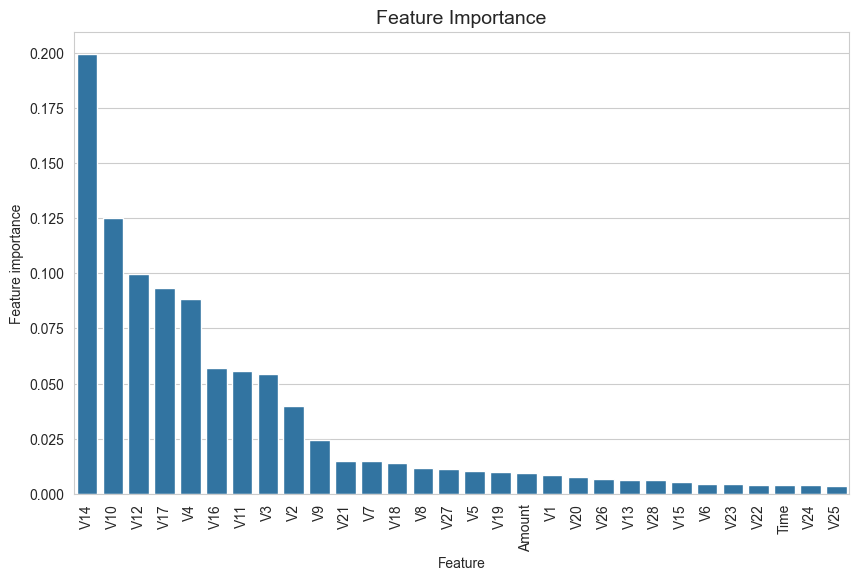

In [109]:
# Feature importance
feature_importances = Random_Forest.feature_importances_
features = X.columns  # Get feature names

# Create a DataFrame for feature importance
tmp = pd.DataFrame({"Feature": features, "Feature importance": feature_importances})
tmp = tmp.sort_values(by = "Feature importance", ascending = False)

# Plotting feature importance
plt.figure(figsize = (10, 6))
plt.title("Feature Importance", fontsize = 14)

# Create the bar plot
s = sns.barplot(x = "Feature", y = "Feature importance", data = tmp)

# Set the x-ticks to the positions of the bars
s.set_xticks(range(len(tmp)))  # Set the tick positions
s.set_xticklabels(tmp["Feature"], rotation = 90)  # Set the tick labels

plt.show()

<Axes: >

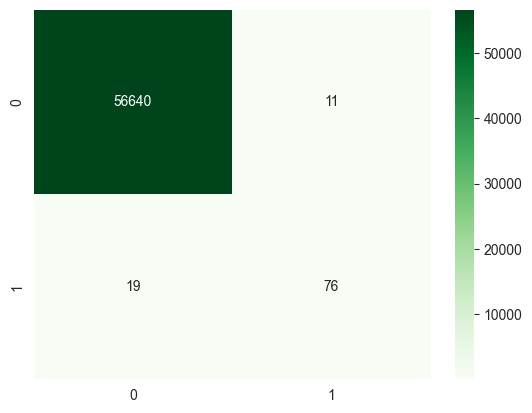

In [110]:
sns.heatmap(confusion_matrix(y_test, y_pred_Random_Forest), annot = True, fmt = "d", cmap = "Greens")

> ### (True Positive - TP) : 76
> ### (True Negative - TN) : 56640
> ### (False Positive - FP) : 11
> ### (False Negative - FN) : 19

> ### XGBoost

In [111]:
# Create the XGBoost classifier
XGboost = XGBClassifier(n_estimators = 300, random_state = 42, max_depth = 6, learning_rate = 0.1)

# Fit the model
XGboost.fit(X_resampled, y_resampled)

# Make predictions
y_pred_XGboost = XGboost.predict(X_test_scaled)
acc_XGboost = accuracy_score(y_test, y_pred_XGboost)

# Print classification report and accuracy
print(classification_report(y_test, y_pred_XGboost, zero_division = 0))
print("Accuracy Score is : {:.2f}%".format(acc_XGboost * 100))

# Calculate ROC AUC score
y_pred_proba_XGboost =XGboost.predict_proba(X_test_scaled)[:, 1]  # Get probabilities for the positive class
roc_auc_XGboost = roc_auc_score(y_test, y_pred_proba_XGboost)
print("ROC AUC Score is : {:.2f}".format(roc_auc_XGboost))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.76      0.81      0.79        95

    accuracy                           1.00     56746
   macro avg       0.88      0.91      0.89     56746
weighted avg       1.00      1.00      1.00     56746

Accuracy Score is : 99.93%
ROC AUC Score is : 0.97


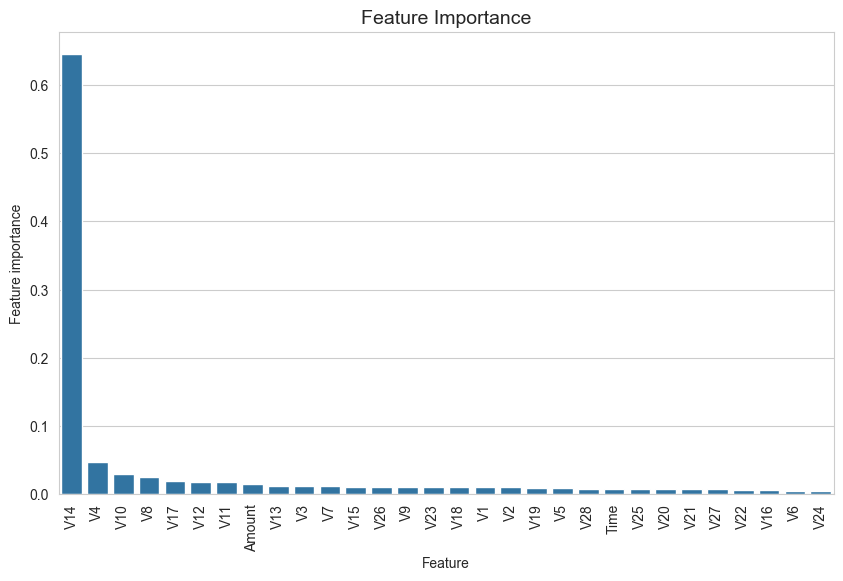

In [112]:
# Feature importance
feature_importances = XGboost.feature_importances_
features = X.columns  # Get feature names

# Create a DataFrame for feature importance
tmp = pd.DataFrame({"Feature": features, "Feature importance": feature_importances})
tmp = tmp.sort_values(by = "Feature importance", ascending = False)

# Plotting feature importance
plt.figure(figsize = (10, 6))
plt.title("Feature Importance", fontsize = 14)

# Create the bar plot
s = sns.barplot(x = "Feature", y = "Feature importance", data = tmp)

# Set the x-ticks to the positions of the bars
s.set_xticks(range(len(tmp)))  # Set the tick positions
s.set_xticklabels(tmp["Feature"], rotation = 90)  # Set the tick labels

plt.show()

<Axes: >

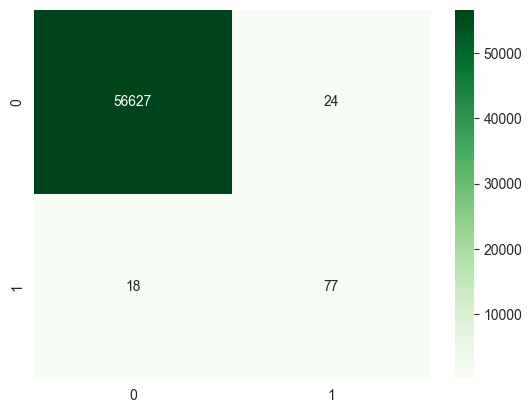

In [113]:
sns.heatmap(confusion_matrix(y_test, y_pred_XGboost), annot = True, fmt = "d", cmap = "Greens")

> ### (True Positive - TP) : 77
> ### (True Negative - TN) : 56627
> ### (False Positive - FP) : 24
> ### (False Negative - FN) : 18

> ### LightGBM

In [115]:
# Create the LightGBM classifier
LightGBM = LGBMClassifier(num_leaves = 300, learning_rate = 0.09, force_col_wise = True, random_state = 42)
# Fit the model
LightGBM.fit(X_resampled, y_resampled)

# Make predictions
y_pred_LightGBM = LightGBM.predict(X_test_scaled)
acc_LightGBM = accuracy_score(y_test, y_pred_LightGBM)

# Print classification report and accuracy
print(classification_report(y_test, y_pred_LightGBM, zero_division = 0))
print("Accuracy Score is : {:.2f}%".format(acc_LightGBM * 100))

# Calculate ROC AUC score
y_pred_proba_LightGBM =LightGBM.predict_proba(X_test_scaled)[:, 1]  # Get probabilities for the positive class
roc_auc_LightGBM = roc_auc_score(y_test, y_pred_proba_LightGBM)
print("ROC AUC Score is : {:.2f}".format(roc_auc_LightGBM))


[LightGBM] [Info] Number of positive: 181281, number of negative: 226602
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 407883, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.444444 -> initscore=-0.223147
[LightGBM] [Info] Start training from score -0.223147
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.79      0.80      0.80        95

    accuracy                           1.00     56746
   macro avg       0.90      0.90      0.90     56746
weighted avg       1.00      1.00      1.00     56746

Accuracy Score is : 99.93%
ROC AUC Score is : 0.96


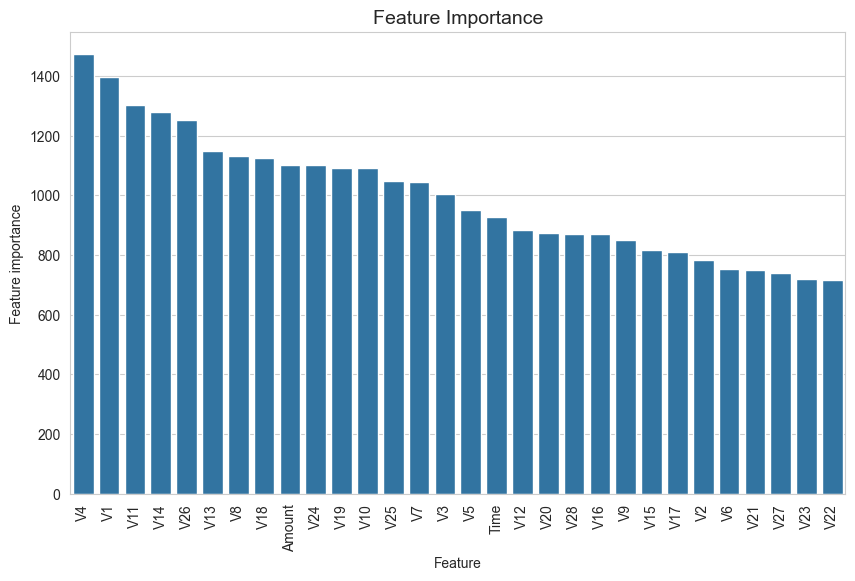

In [116]:
# Feature importance
feature_importances = LightGBM.feature_importances_
features = X.columns  # Get feature names

# Create a DataFrame for feature importance
tmp = pd.DataFrame({"Feature": features, "Feature importance": feature_importances})
tmp = tmp.sort_values(by = "Feature importance", ascending = False)

# Plotting feature importance
plt.figure(figsize = (10, 6))
plt.title("Feature Importance", fontsize = 14)

# Create the bar plot
s = sns.barplot(x = "Feature", y = "Feature importance", data = tmp)

# Set the x-ticks to the positions of the bars
s.set_xticks(range(len(tmp)))  # Set the tick positions
s.set_xticklabels(tmp["Feature"], rotation = 90)  # Set the tick labels

plt.show()


<Axes: >

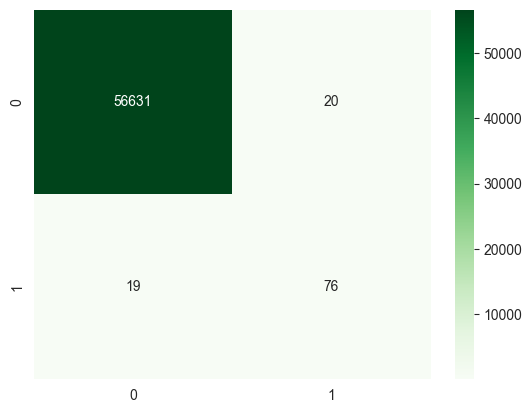

In [117]:
sns.heatmap(confusion_matrix(y_test, y_pred_LightGBM), annot = True, fmt = "d", cmap = "Greens")

> ### (True Positive - TP) : 76
> ### (True Negative - TN) : 56631
> ### (False Positive - FP) : 20
> ### (False Negative - FN) : 19

> ### Logistic Regression Classifier

In [118]:
# Initialize and fit the Logistic regression
Logistic = LogisticRegression(max_iter = 30000, random_state = 42, C = 1, solver = "liblinear")
Logistic.fit(X_resampled, y_resampled)

# Make predictions
y_pred_Logistic = Logistic.predict(X_test_scaled)

# Calculate accuracy
acc_Logistic = accuracy_score(y_test, y_pred_Logistic)

# Print classification report and accuracy
print(classification_report(y_test, y_pred_Logistic, zero_division =  0))
print("Accuracy Score is : {:.2f}%".format(acc_Logistic * 100))

# Calculate ROC AUC score
y_pred_proba_Logistic = Logistic.predict_proba(X_test_scaled)[:, 1]  # Get probabilities for the positive class
roc_auc_Logistic = roc_auc_score(y_test, y_pred_proba_Logistic)
print("ROC AUC Score is : {:.2f}".format(roc_auc_Logistic))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56651
           1       0.07      0.87      0.13        95

    accuracy                           0.98     56746
   macro avg       0.53      0.93      0.56     56746
weighted avg       1.00      0.98      0.99     56746

Accuracy Score is : 97.96%
ROC AUC Score is : 0.96


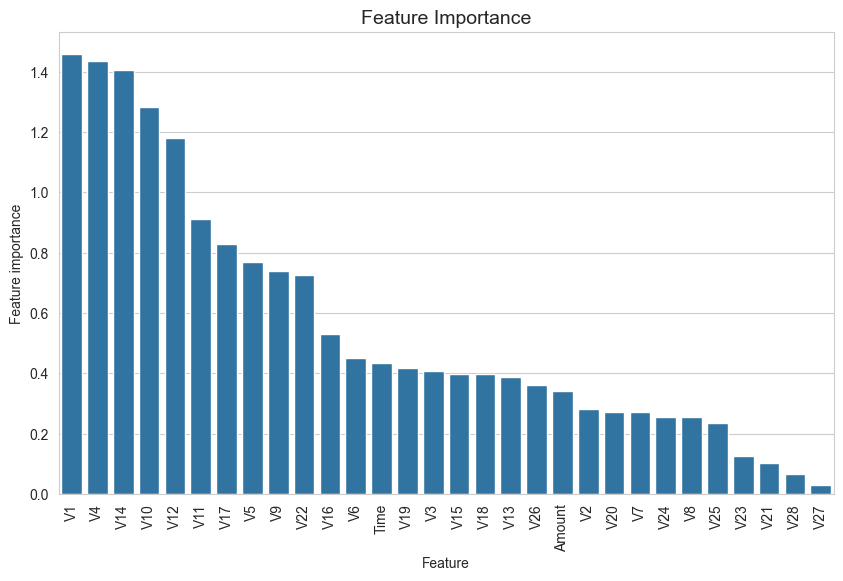

In [119]:
# Feature importance from coefficients
feature_importances = np.abs(Logistic.coef_[0])  # Get absolute values of coefficients
features = X.columns  # Get feature names

# Create a DataFrame for feature importance
tmp = pd.DataFrame({"Feature": features, "Feature importance": feature_importances})
tmp = tmp.sort_values(by = "Feature importance", ascending = False)

# Plotting feature importance
plt.figure(figsize = (10, 6))
plt.title("Feature Importance", fontsize = 14)

# Create the bar plot
s = sns.barplot(x = "Feature", y = "Feature importance", data = tmp)

# Set the x-ticks to the positions of the bars
s.set_xticks(range(len(tmp)))  # Set the tick positions
s.set_xticklabels(tmp["Feature"], rotation = 90)  # Set the tick labels

plt.show()

<Axes: >

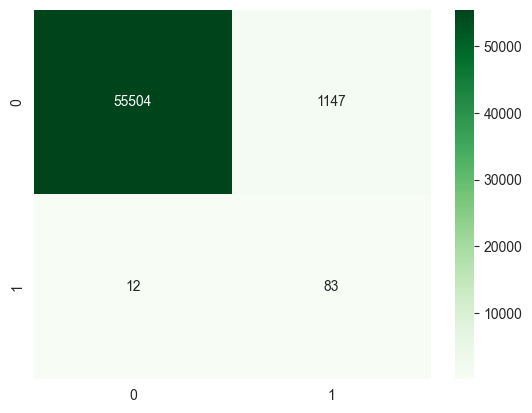

In [120]:
sns.heatmap(confusion_matrix(y_test, y_pred_Logistic), annot = True, fmt = "d", cmap = "Greens")

> ### (True Positive - TP) : 83
> ### (True Negative - TN) : 55504
> ### (False Positive - FP) : 1147
> ### (False Negative - FN) : 12

> ### KNN

In [121]:
# Create the KNN classifier
KNN = KNeighborsClassifier(n_neighbors = 3, weights = 'distance')

# Fit the model
KNN.fit(X_resampled, y_resampled)

# Make predictions
y_pred_KNN = KNN.predict(X_test_scaled)
acc_KNN = accuracy_score(y_test, y_pred_KNN)

# Print classification report and accuracy
print(classification_report(y_test, y_pred_KNN, zero_division = 0))
print("Accuracy Score is : {:.2f}%".format(acc_KNN * 100))

# Calculate ROC AUC score
y_pred_proba_KNN =KNN.predict_proba(X_test_scaled)[:, 1]  # Get probabilities for the positive class
roc_auc_KNN = roc_auc_score(y_test, y_pred_proba_KNN)
print("ROC AUC Score is : {:.2f}".format(roc_auc_KNN))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.44      0.79      0.56        95

    accuracy                           1.00     56746
   macro avg       0.72      0.89      0.78     56746
weighted avg       1.00      1.00      1.00     56746

Accuracy Score is : 99.80%
ROC AUC Score is : 0.90


<Axes: >

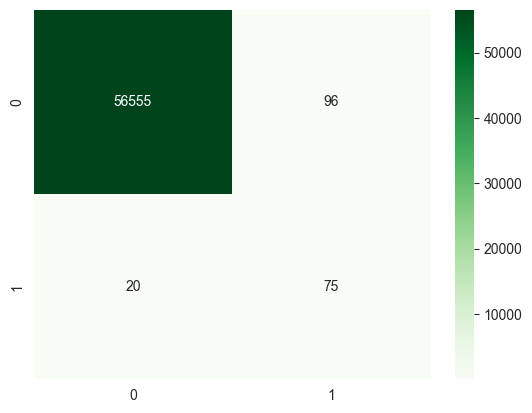

In [122]:
sns.heatmap(confusion_matrix(y_test, y_pred_KNN), annot = True, fmt = "d", cmap = "Greens")

> ### (True Positive - TP) : 75
> ### (True Negative - TN) : 56555
> ### (False Positive - FP) : 96
> ### (False Negative - FN) : 20

> ### Neural Networks (Multi-Layer Perceptron)

In [123]:
MLP = MLPClassifier(max_iter = 200, random_state = 42, hidden_layer_sizes = (100,), activation = "relu") 

MLP.fit(X_resampled, y_resampled)

y_pred_MLP = MLP.predict(X_test_scaled)
acc_MLP = accuracy_score(y_test, y_pred_MLP)

print(classification_report(y_test, y_pred_MLP, zero_division = 0))
print("Accuracy Score is : {:.2f}%".format(acc_MLP * 100))

# Calculate ROC AUC score
y_pred_proba_MLP = MLP.predict_proba(X_test_scaled)[:, 1]  # Get probabilities for the positive class
roc_auc_MLP = roc_auc_score(y_test, y_pred_proba_MLP)
print("ROC AUC Score is : {:.2f}".format(roc_auc_MLP))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.72      0.77      0.74        95

    accuracy                           1.00     56746
   macro avg       0.86      0.88      0.87     56746
weighted avg       1.00      1.00      1.00     56746

Accuracy Score is : 99.91%
ROC AUC Score is : 0.94


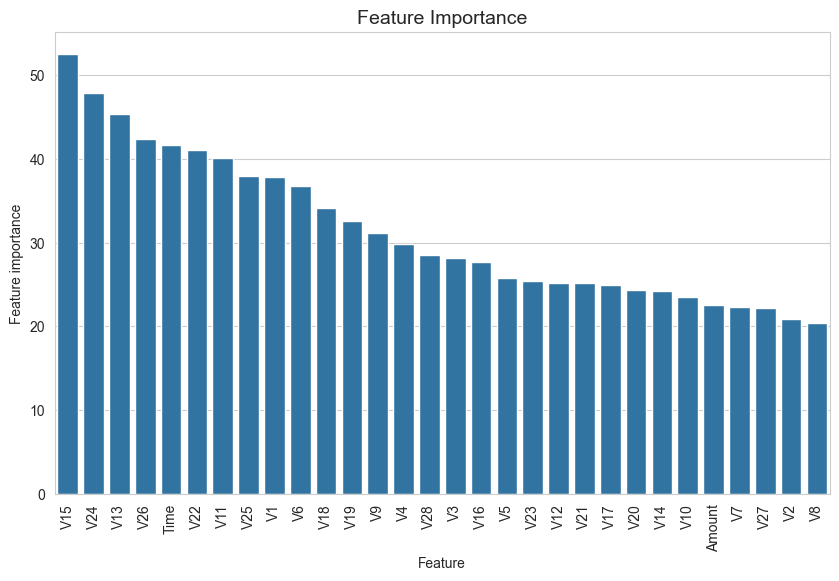

In [124]:
# Feature importance from weights
feature_importances = np.abs(MLP.coefs_[0]).sum(axis = 1)  # Sum absolute weights for each feature
features = X.columns  # Get feature names

# Create a DataFrame for feature importance
tmp = pd.DataFrame({"Feature": features, "Feature importance": feature_importances})
tmp = tmp.sort_values(by = "Feature importance", ascending = False)

# Plotting feature importance
plt.figure(figsize = (10, 6))
plt.title("Feature Importance", fontsize = 14)

# Create the bar plot
s = sns.barplot(x = "Feature", y = "Feature importance", data = tmp)

# Set the x-ticks to the positions of the bars
s.set_xticks(range(len(tmp)))  # Set the tick positions
s.set_xticklabels(tmp["Feature"], rotation = 90)  # Set the tick labels

plt.show()

<Axes: >

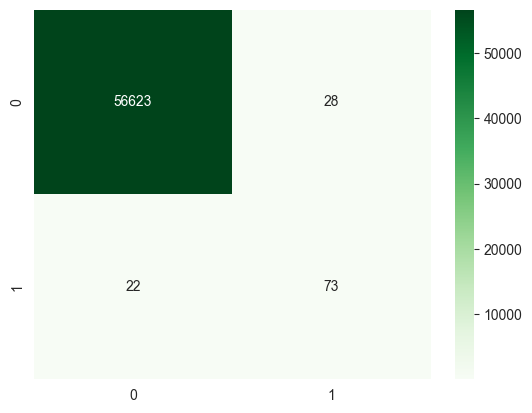

In [125]:
sns.heatmap(confusion_matrix(y_test, y_pred_MLP), annot = True, fmt = "d", cmap = "Greens")

> ### (True Positive - TP) : 73
> ### (True Negative - TN) : 56623
> ### (False Positive - FP) : 28
> ### (False Negative - FN) : 22

In [126]:
results_df.sort_values(by="F1 Score", ascending=False)

,Model,F1 Score,Precision,Recall,AUC-ROC,Mean AUC-ROC,Std AUC-ROC
0,Random Forest,0.837989,0.892857,0.789474,0.977539,0.999997,4.033686e-07
1,XGBoost,0.783505,0.767677,0.800000,0.973910,0.999990,3.295345e-06
5,Neural Network,0.751323,0.755319,0.747368,0.948314,0.999971,9.282256e-06
2,LightGBM,0.519573,0.392473,0.768421,0.933100,0.999965,4.630886e-05
4,KNN,0.490323,0.353488,0.800000,0.899177,0.999543,9.733997e-05
3,Logistic Regression,0.103234,0.054858,0.873684,0.960250,0.991433,3.154559e-04


> ### As mentioned earlier, given that the dataset is about financial transactions, the criteria F1 Score and AUC-ROC are of priority to us.
> ### the highest F1 Score Measure for class 1: Random Forest
> ### the highest ROC AUC Measure for class 1: Random Forest

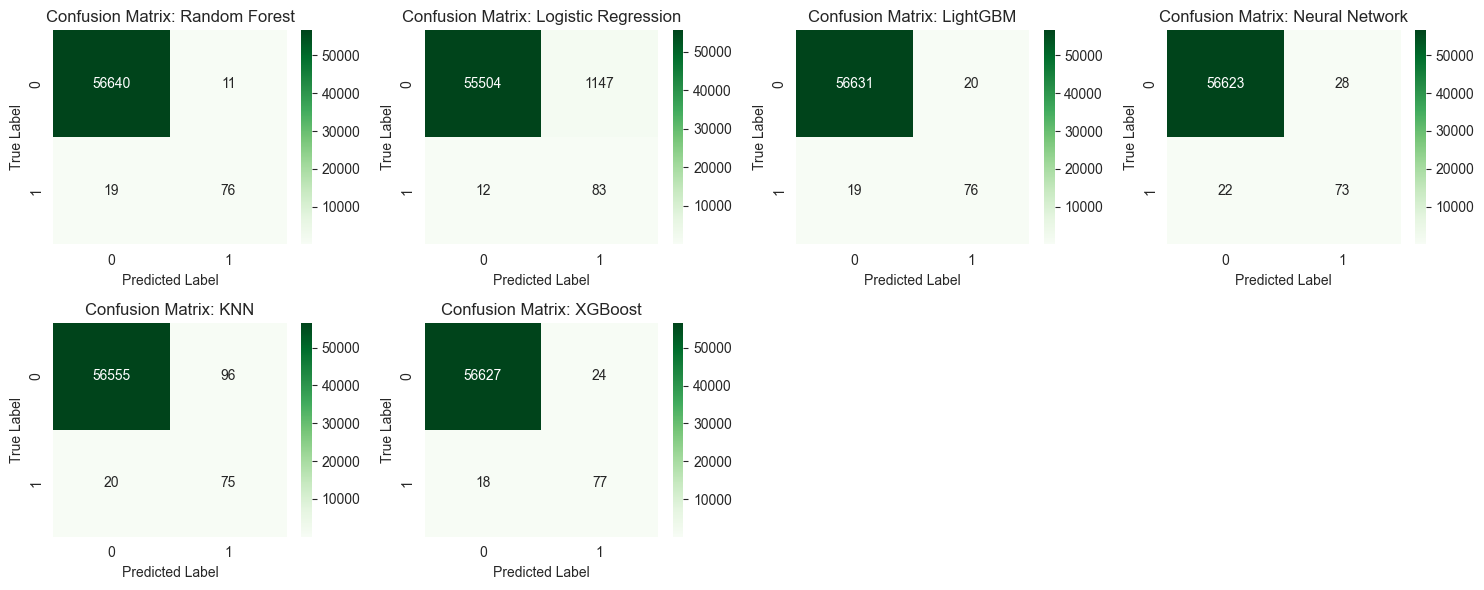

In [127]:
# Assuming you have your predictions in the models dictionary
models = {
    "Random Forest": y_pred_Random_Forest,
    "Logistic Regression": y_pred_Logistic,
    "LightGBM": y_pred_LightGBM,
    "Neural Network": y_pred_MLP,
    "KNN": y_pred_KNN,
    "XGBoost": y_pred_XGboost,
}

# Create a figure for the confusion matrices
fig, axes = plt.subplots(2, 4, figsize=(15, 6))  # Adjust the size as needed
axes = axes.flatten()  # Flatten the 2D array of axes for easy indexing

# Loop through each model and plot the confusion matrix
for i, (model_name, y_pred) in enumerate(models.items()):
    cm = confusion_matrix(y_test, y_pred)  # Calculate confusion matrix
    sns.heatmap(cm, annot=True, fmt="d", ax=axes[i], cmap="Greens", 
                xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    
    axes[i].set_title(f"Confusion Matrix: {model_name}")
    axes[i].set_xlabel("Predicted Label")
    axes[i].set_ylabel("True Label")

# Hide the last subplot if there are fewer than 8 models
for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

> ## the highest TP = XGBoost
> ## the highest TN = Random forest
> ## the lower FP = Random forest
> ## the lower FN = XGBoost

> ## Conclusion :
> ### By optimizing the Random Forest model, we were able to increase the rate of prediction and detection of fraudulent transactions to 84%.
> ### Best parameters for Random Forest: {max_depth = 20, min_samples_leaf = 2, min_samples_split = 2, n_estimators = 100, random_state = 42}